<a href="https://colab.research.google.com/github/ASMITHAVARSHA/Machine-Learning-Based-Predictive-Analysis-of-Heart-Failures/blob/main/Machine_Learning_Based_Predictive_Analysis_of_Heart_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
pip install tensorflow scikit-learn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_excel('/content/heart_failure_clinical_records_dataset.xlsx')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Data pre-processing
features = df.drop(columns=['DEATH_EVENT'])
target = df['DEATH_EVENT']

In [ ]:
#Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


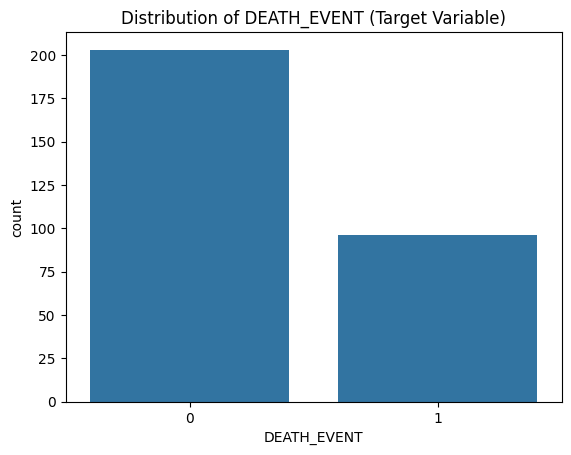

In [ ]:
#Visualization
sns.countplot(x='DEATH_EVENT', data=df)
plt.title("Distribution of DEATH_EVENT (Target Variable)")
plt.show()

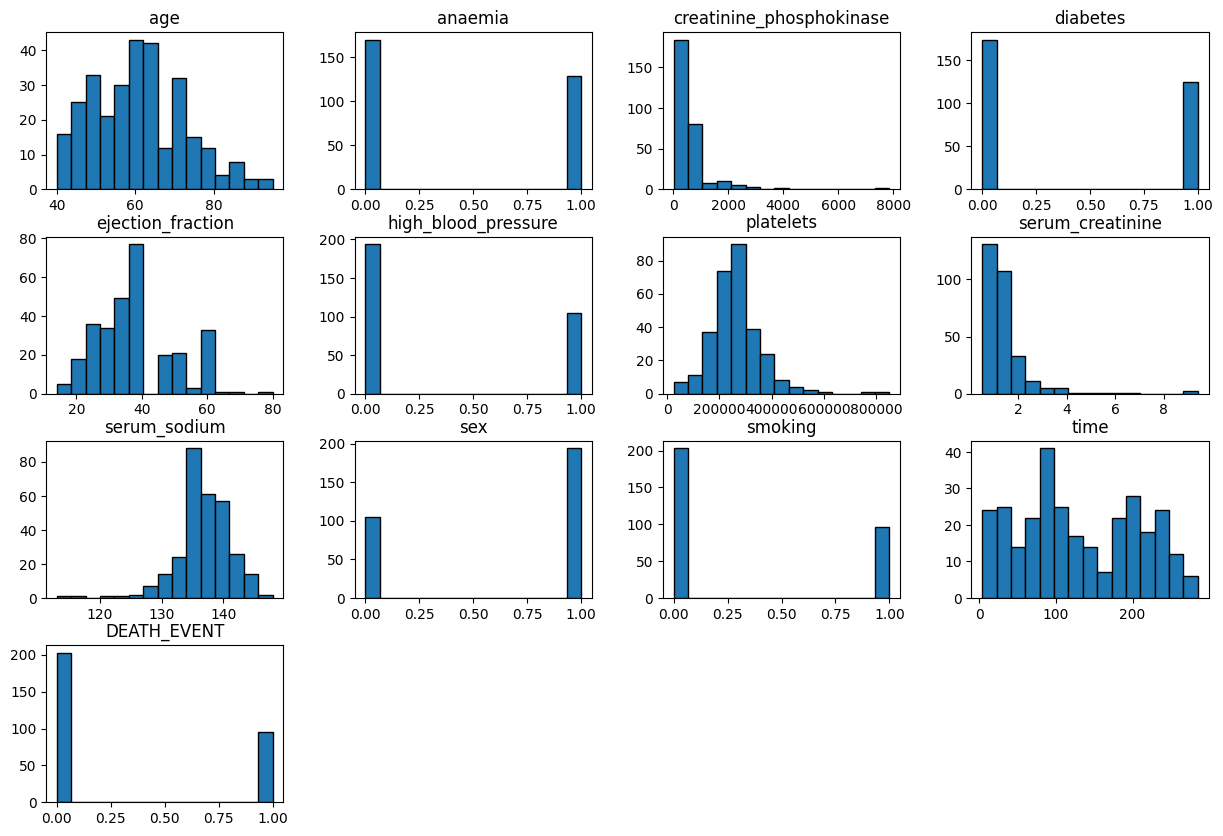

In [ ]:
df.hist(bins=15, figsize=(15, 10), grid=False, edgecolor='black')
plt.show()

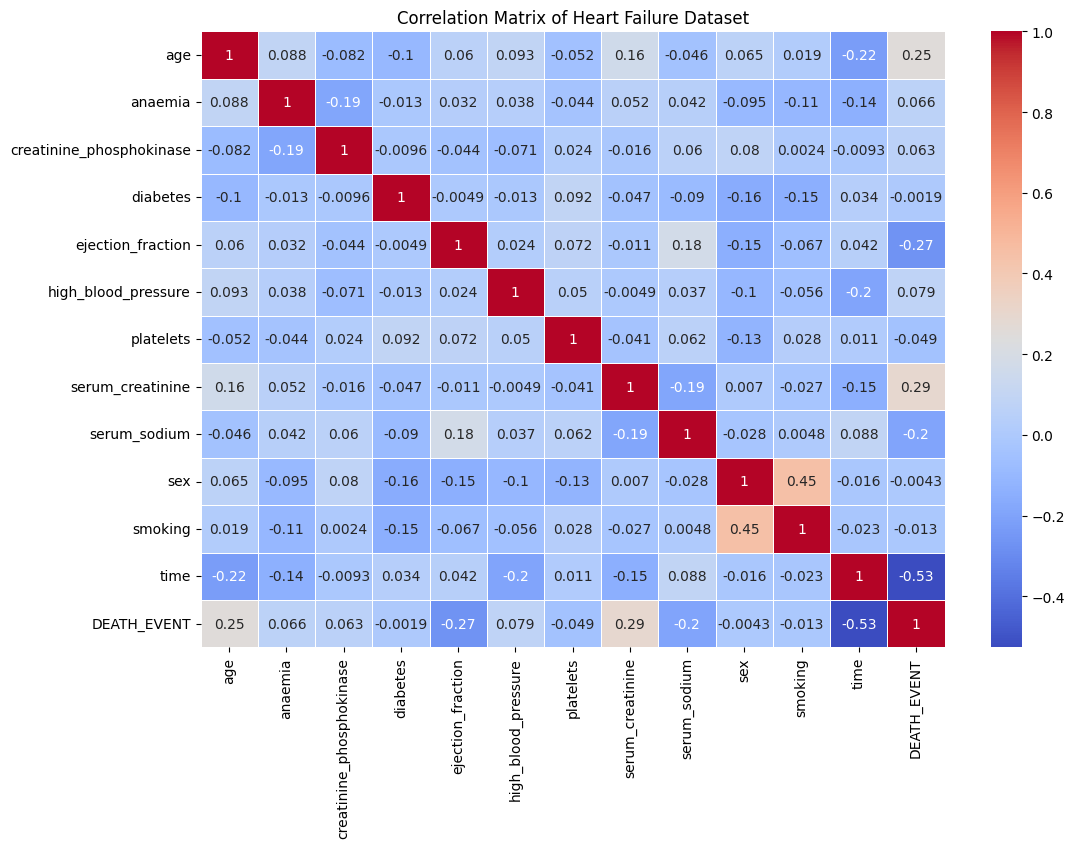

In [ ]:
#Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Heart Failure Dataset")
plt.show()

In [ ]:
#Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict with SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM Model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

SVM Accuracy: 0.8


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict with Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression Model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60

Logistic Regression Accuracy: 0.8


In [ ]:
#Artificial Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
ann_model.add(Dense(8, activation='relu'))  # Second hidden layer
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model
ann_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Predict with ANN
y_pred_ann_prob = ann_model.predict(X_test)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int)

# Evaluate ANN Model
print("ANN Classification Report:\n", classification_report(y_test, y_pred_ann))
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6361 - loss: 0.6598
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7367 - loss: 0.6071
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7174 - loss: 0.5955
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7618 - loss: 0.5503
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6853 - loss: 0.5642
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7524 - loss: 0.5137
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8099 - loss: 0.4809
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8285 - loss: 0.4665
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8086 - loss: 0.4482
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8436 - loss: 0.4386
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8409 - loss: 0.3919
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8677 - lo

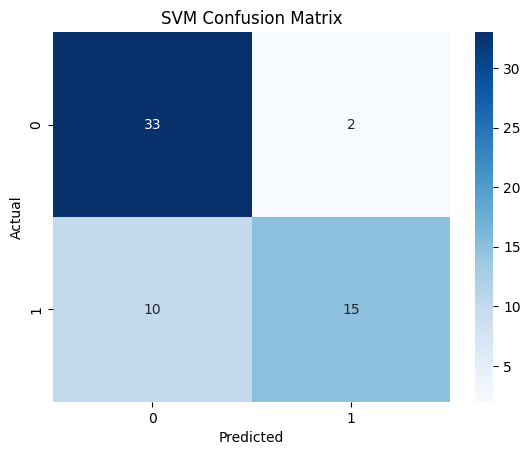

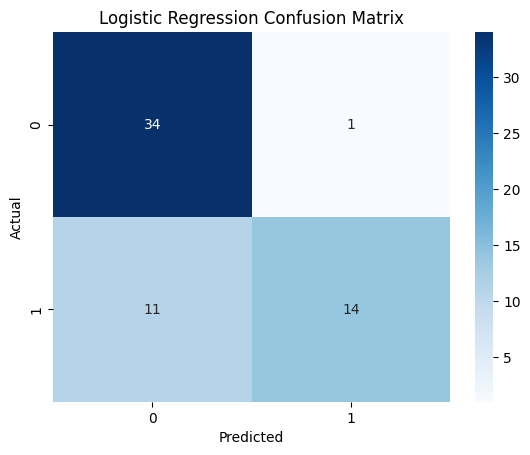

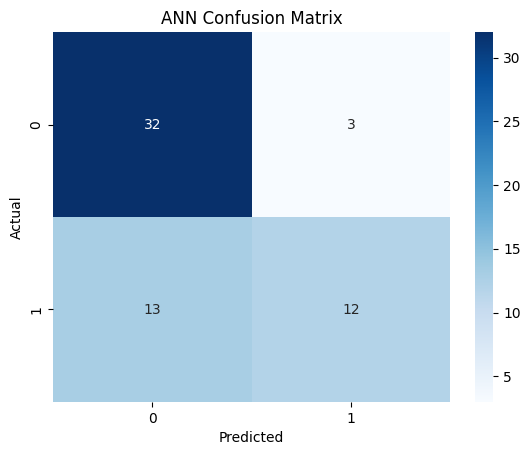

In [ ]:
#confusion matrix
def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
plot_confusion_matrix(conf_matrix_svm, 'SVM Confusion Matrix')
plot_confusion_matrix(conf_matrix_lr, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(conf_matrix_ann, 'ANN Confusion Matrix')

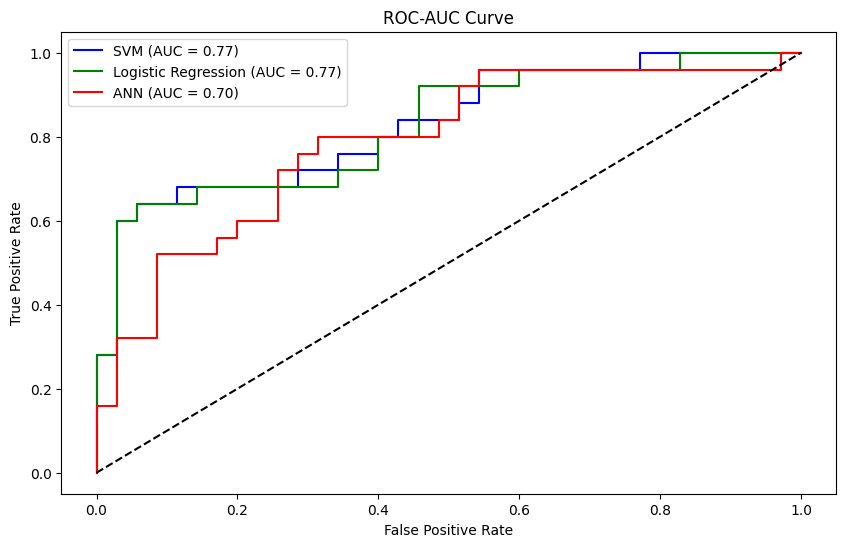

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


# Calculate ROC curves
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_ann_prob)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_lr, tpr_lr, color='green', label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_ann, tpr_ann, color='red', label='ANN (AUC = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


In [ ]:
# Model Summary
print("Model Comparison:")
print("-----------------")
print("SVM Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("LR Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_lr)))
print("ANN Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_ann)))

print("\nSVM ROC-AUC: {:.2f}".format(roc_auc_svm))
print("LR ROC-AUC: {:.2f}".format(roc_auc_lr))
print("ANN ROC-AUC: {:.2f}".format(roc_auc_ann))


Model Comparison:
-----------------
SVM Accuracy: 0.80
LR Accuracy: 0.80
ANN Accuracy: 0.73

SVM ROC-AUC: 0.77
LR ROC-AUC: 0.77
ANN ROC-AUC: 0.70
